In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [7]:
a=np.load('tutorial_data/c.npy')
b=a[0,0,0]

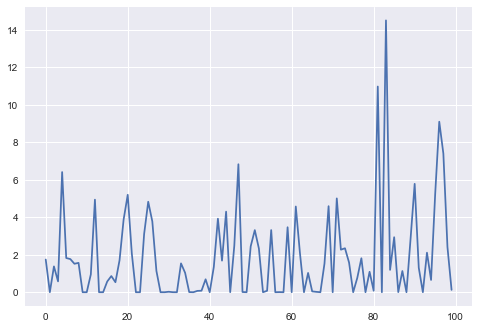

In [8]:
plt.plot(b)
plt.show()

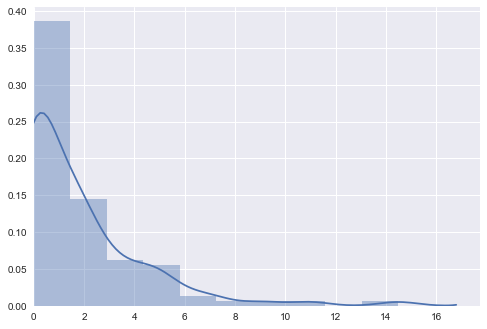

In [11]:
c=sns.distplot(b, bins=10)
plt.xlim(0)
plt.show()

/Users/jinwooim24/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jinwooim24/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/jinwooim24/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


Fitted gamma distribution with error=2.5460759329176033)
Fitted exponweib distribution with error=2.917525155816018)
Fitted lognorm distribution with error=4.988277473321238)
Fitted beta distribution with error=2.25812331257574)


/Users/jinwooim24/anaconda/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/jinwooim24/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jinwooim24/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys


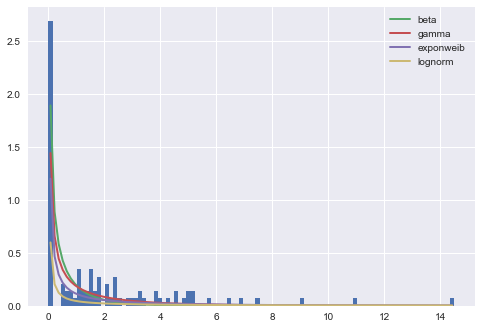

In [12]:
from fitter import Fitter

plt.hold(True)
f = Fitter(b, distributions=['gamma', 'exponweib', 'lognorm', 'beta'])
f.fit()
f.summary()
plt.hold(False)
plt.show()

/Users/jinwooim24/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/jinwooim24/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/jinwooim24/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/jinwooim24/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or F

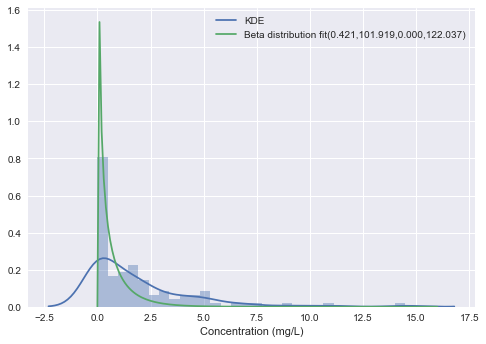

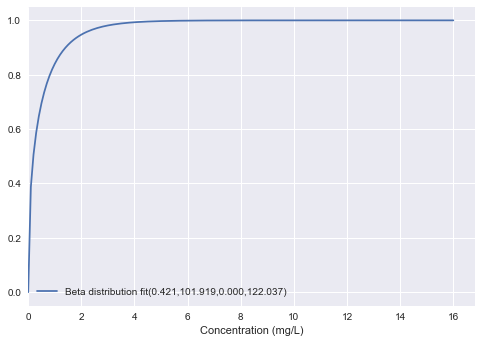

In [13]:
par=f.fitted_param['beta'] # extract parameters
par_str = "(" + ','.join(format(p, '.3f') for p in par)+")" # format the string for display
beta = stats.beta # load the distrbution
x = np.linspace(0,16,161) # define axis
betapdf = beta.pdf(x, *par) #  evaluate distribution on this axis, using fitted parameters
plt.hold(True)
sns.distplot(b,bins=30,kde_kws={"label": "KDE"}) # Now plot it next to original distribution
plt.plot(x,betapdf,label="Beta distribution fit" + par_str)
plt.hold(False)

plt.xlabel("Concentration (mg/L)")
plt.legend()
plt.show()

betacdf = beta.cdf(x, *par)
plt.plot(x,betacdf,label="Beta distribution fit" + par_str)
plt.xlim(0)
plt.xlabel("Concentration (mg/L)")
plt.legend()
plt.show()

In [93]:
1-betacdf[10]

0.15980654794627358

In [94]:
x[10]

1.0

In [15]:
s,p = stats.kstest(b,'beta',args=par)
#the Kolmogorov-Smyrnov test of the hypothesis  H0="The data follow a beta distribution with input parameters"
print(p)

3.58602036954e-13


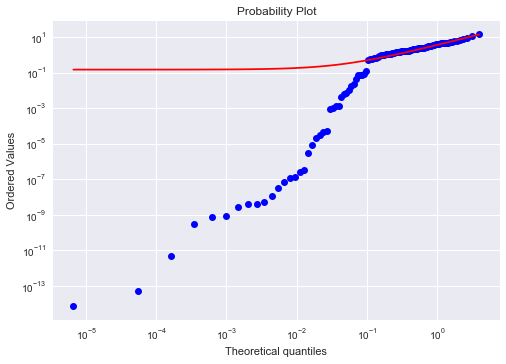

In [16]:
stats.probplot(b, sparams=par, dist="beta", plot=plt)
plt.yscale('log')
plt.xscale('log')
plt.show()